In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [15]:
# The path to the data file
filepath = '../ML-colab/dataset/SAheart.data'

# The delimiter used to separate the columns in the file
# delimiter = '\t'

# The row number that contains the column names
# header = 0

# Read the data file into a DataFrame
#df = pd.read_csv(filepath, delimiter=delimiter, header=header)
df = pd.read_csv(filepath)

# Print the DataFrame
print(df)

     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  

In [16]:
df.columns


Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [17]:
df = df.drop('row.names', axis=1)

There are no categorical variable, all columns are numeric variables, non null values zero.
***
A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- sbp		systolic blood pressure 
- tobacco		cumulative tobacco (kg) 
- ldl		low densiity lipoprotein cholesterol 
- adiposity famhist		family history of heart disease (Present, Absent)
- typea		type-A behavior
- obesity
- alcohol		current alcohol consumption
- age		age at onset
- chd		response, coronary heart disease***

In [18]:
#How many records are present in the dataset
df.shape

(462, 10)

In [19]:
#Print the metadata information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [20]:
df.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


<Axes: xlabel='chd', ylabel='famhist'>

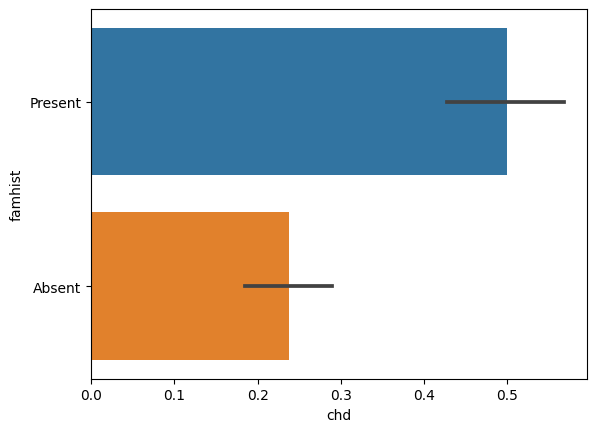

In [21]:
#bar chart chd vs family history
sn.barplot(data=df,x='chd',y='famhist')

<Axes: xlabel='age', ylabel='sbp'>

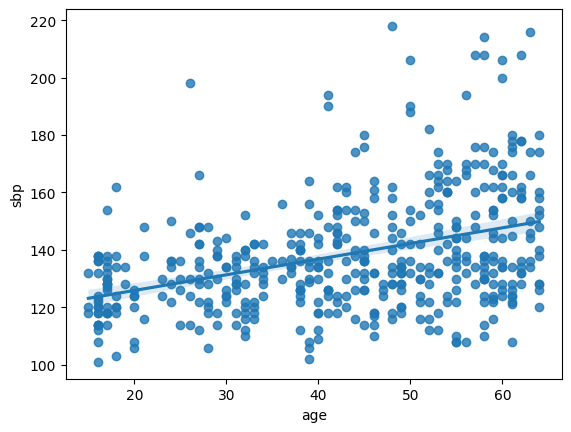

In [22]:
#Age vs sbp correlation
sn.regplot(data=df,x='age',y='sbp')

In [23]:
initial_feature = ['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity', 'alcohol', 'age']
      

c:\Users\I055948\Anaconda3\envs\AI_ML_Proj_Env\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\I055948\Anaconda3\envs\AI_ML_Proj_Env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


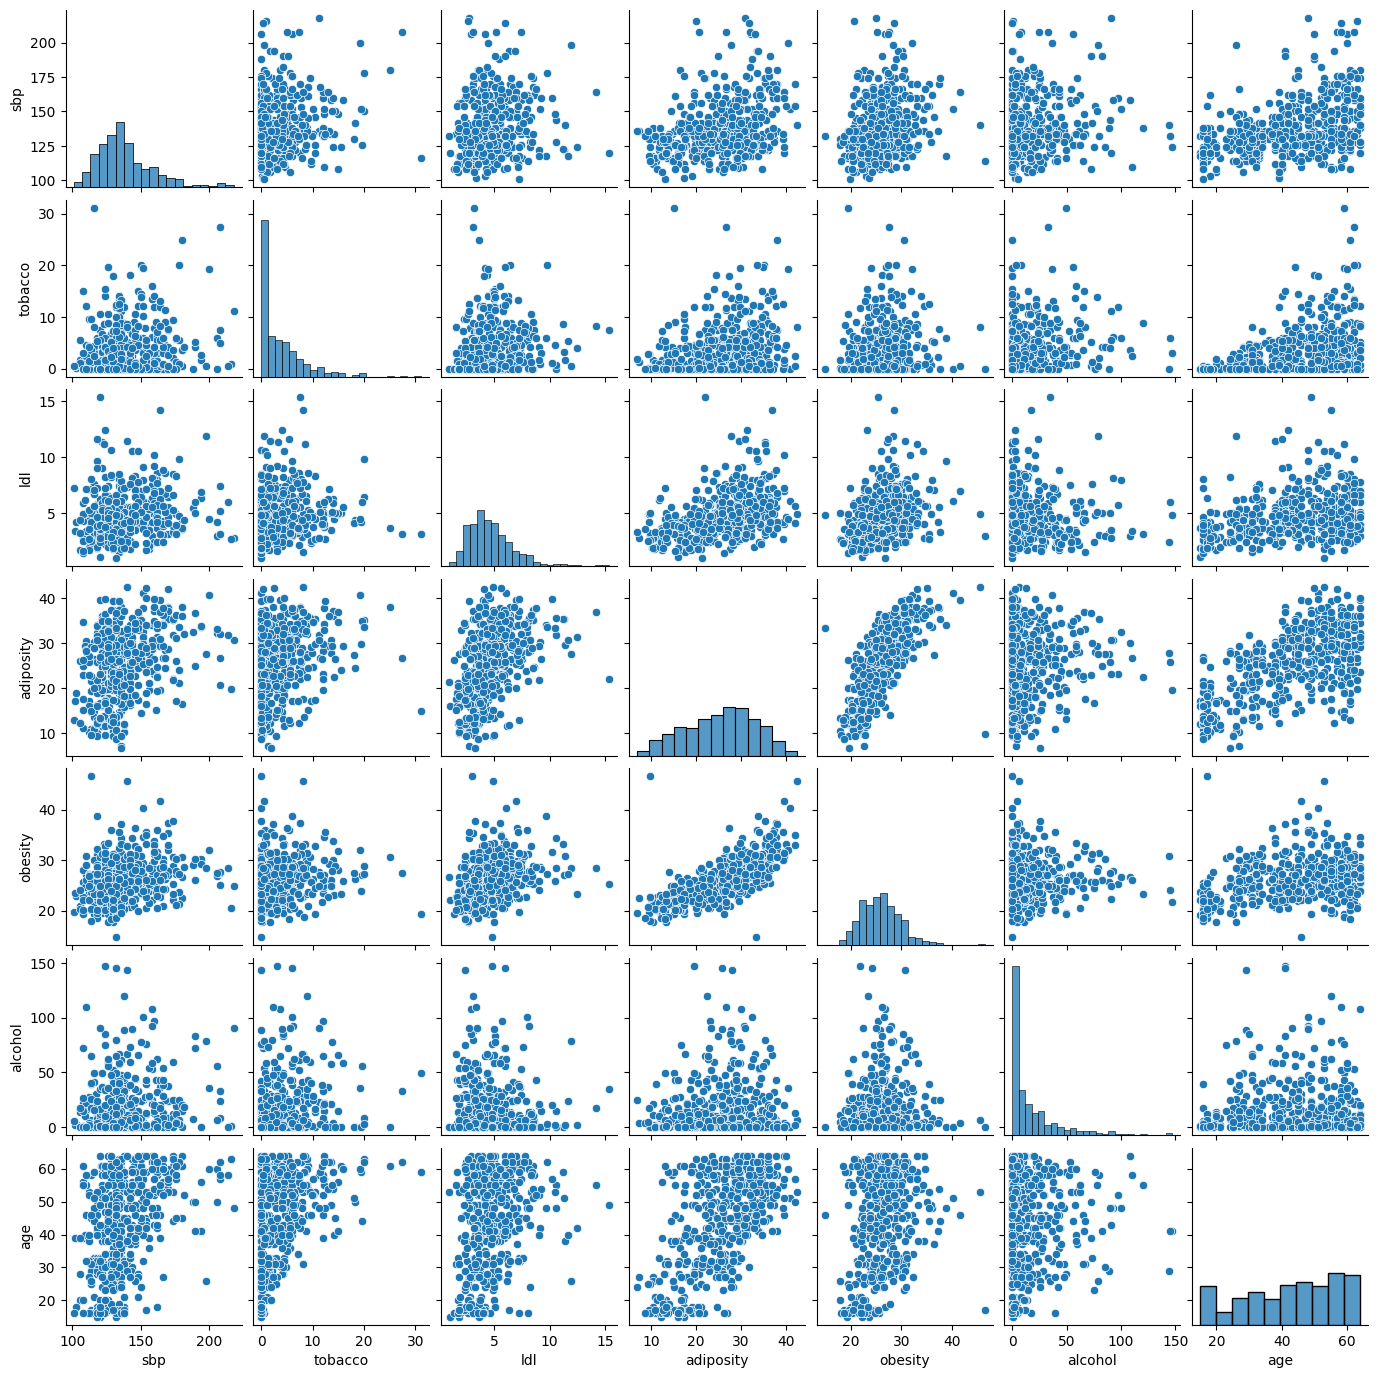

In [24]:
sn.pairplot(df[initial_feature], size = 2)

In [25]:
# To find the correlation between variables
df[initial_feature].corr()

,sbp,tobacco,ldl,adiposity,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,0.716556,0.100330,0.625954
obesity,0.238067,0.124529,0.330506,0.716556,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,0.291777,0.101125,1.000000


<Axes: >

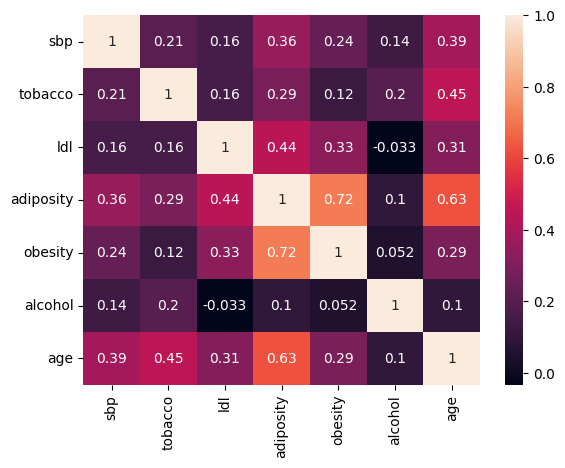

In [26]:
sn.heatmap(df[initial_feature].corr(),annot=True)

In [47]:
#how to standard scale data
df_n = df
df_n = df_n.drop(['famhist','typea'],axis=1)
#df_n.reset_index(inplace=True)
df_n.columns


Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity', 'alcohol', 'age',
       'chd'],
      dtype='object')

In [48]:
initial_feature = ['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity','alcohol', 'age','chd']
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df_n.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns= initial_feature)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,sbp,tobacco,ldl,adiposity,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,-0.176786,3.277738,0.629336,1.373863
1,0.277089,-0.790237,-0.159680,0.412140,0.671373,-0.612745,1.383115,1.373863
2,-0.992806,-0.774980,-0.609245,0.884332,0.735519,-0.541183,0.218184,-0.727875
3,1.546985,0.842264,0.807126,1.624141,1.412621,0.295062,1.040488,1.373863
4,-0.211332,2.171805,-0.599577,0.305351,-0.012856,1.647775,0.423760,1.373863


<Axes: >

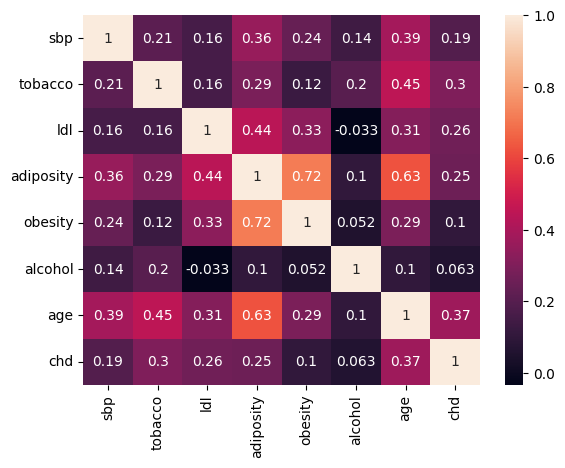

In [49]:
sn.heatmap(df[initial_feature].corr(),annot=True)
# Scaling has no impact on Correlation function

In [51]:
#dfoc.loc[(dfoc['Long-runner'] == 'N') & (dfoc['Delayed Response'] == 'Y'),'Incident Condition'] = '04_Delayed response'
df_ag = df
df_ag.loc[(df_ag['age'] > 0) & (df_ag['age'] < 15), 'agegroup'] = 'young'
df_ag.loc[(df_ag['age'] >= 15) & (df_ag['age'] < 35), 'agegroup'] = 'adults'
df_ag.loc[(df_ag['age'] >= 35) & (df_ag['age'] < 55), 'agegroup'] = 'mid'
df_ag.loc[(df_ag['age'] >= 55), 'agegroup'] = 'old'
df_ag.sample(5)




,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
39,136,11.20,5.81,31.85,Present,75,27.68,22.94,58,1,old
114,116,31.20,3.17,14.99,Absent,47,19.40,49.06,59,1,old
377,118,1.25,4.69,31.58,Present,52,27.16,4.11,53,0,mid
27,145,9.10,5.24,27.55,Absent,59,20.96,21.60,61,1,old
282,206,0.00,4.17,33.23,Absent,69,27.36,6.17,50,1,mid


In [53]:
df_ag['agegroup'].value_counts()


mid       189
adults    143
old       130
Name: agegroup, dtype: int64

In [55]:
df_ag['agegroup'].unique()

array(['mid', 'old', 'adults'], dtype=object)

<Axes: xlabel='agegroup', ylabel='ldl'>

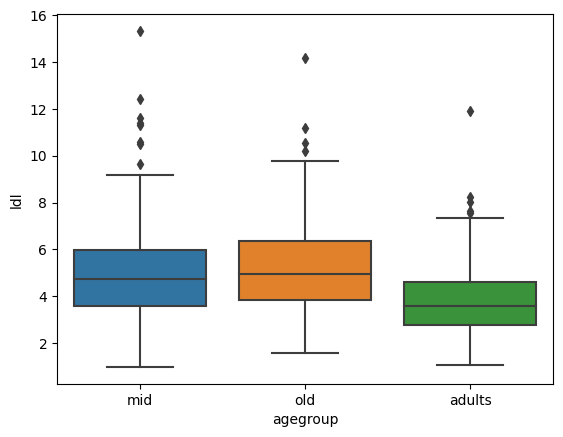

In [56]:
sn.boxplot(data=df_ag,x='agegroup',y='ldl')